In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

from glob import glob
from datetime import datetime, timedelta

Let's get all the files from seattle folder

In [2]:
list_of_files = glob('./seattle/*.csv')

In [3]:
list_of_files

['./seattle/reviews.csv', './seattle/listings.csv', './seattle/calendar.csv']

Now let us put all the files into pandas dataframes and see what we can do with them

In [4]:
r_df = pd.read_csv(list_of_files[0]) #Reviews data
l_df = pd.read_csv(list_of_files[1]) #Listing data
c_df = pd.read_csv(list_of_files[2]) #Calendar data

### Exploring Review Data

In [5]:
r_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Not sure we will use this data all during this analysis, it might come in handy in future explorations. For now data like when the review was posted and what is being said by Customers about rental experience

### Exploring Calendar Data

In [6]:
c_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
c_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [8]:
c_df.shape

(1393570, 4)

In [9]:
# dropping all the nan values
c_df.dropna(subset=["price"], inplace=True)

### Exploring Listing Data

In [10]:
l_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [11]:
l_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Based on the above we can see that some of the variables has missing fields, lets prepare dataframe that we can work with and will give us some good analysis

In [12]:
l_df_mod = l_df[['id', 'neighbourhood', 'property_type', 'bedrooms', 
      'beds', 'price', 'security_deposit', 'extra_people', 
      'review_scores_rating', 'latitude', 'longitude', ]]

Let us start with cleaning price data, we need to convert all of them to numbers so we can plot them in histogram

In [13]:
l_df_mod.head(10)

,id,neighbourhood,property_type,bedrooms,beds,price,security_deposit,extra_people,review_scores_rating,latitude,longitude
0,241032,Queen Anne,Apartment,1.0,1.0,$85.00,NaN,$5.00,95.0,47.636289,-122.371025
1,953595,Queen Anne,Apartment,1.0,1.0,$150.00,$100.00,$0.00,96.0,47.639123,-122.365666
2,3308979,Queen Anne,House,5.0,7.0,$975.00,"$1,000.00",$25.00,97.0,47.629724,-122.369483
3,7421966,Queen Anne,Apartment,0.0,2.0,$100.00,NaN,$0.00,NaN,47.638473,-122.369279
4,278830,Queen Anne,House,3.0,3.0,$450.00,$700.00,$15.00,92.0,47.632918,-122.372471
5,5956968,Queen Anne,House,1.0,1.0,$120.00,NaN,$30.00,95.0,47.630525,-122.366174
6,1909058,Queen Anne,House,1.0,1.0,$80.00,$150.00,$10.00,99.0,47.636605,-122.368519
7,856550,Queen Anne,Cabin,1.0,1.0,$60.00,$150.00,$0.00,97.0,47.640161,-122.375856
8,4948745,Queen Anne,Apartment,1.0,1.0,$90.00,NaN,$0.00,97.0,47.632410,-122.357216
9,2493658,Queen Anne,Apartment,1.0,1.0,$150.00,$100.00,$0.00,97.0,47.637492,-122.366889


In [14]:
l_df_mod['price'] = pd.to_numeric(l_df_mod.price.apply(lambda x: str(x).replace('$', '').replace(',','')), errors='coerce')
l_df_mod['security_deposit'] = pd.to_numeric(l_df_mod['security_deposit'].apply(lambda x: str(x).replace('$','').replace(',','')), errors='coerce')
l_df_mod['extra_people'] = pd.to_numeric(l_df_mod['extra_people'].apply(lambda x: str(x).replace('$','').replace(',','')), errors='coerce')

/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [15]:
l_df_mod.head()

,id,neighbourhood,property_type,bedrooms,beds,price,security_deposit,extra_people,review_scores_rating,latitude,longitude
0,241032,Queen Anne,Apartment,1.0,1.0,85.0,NaN,5.0,95.0,47.636289,-122.371025
1,953595,Queen Anne,Apartment,1.0,1.0,150.0,100.0,0.0,96.0,47.639123,-122.365666
2,3308979,Queen Anne,House,5.0,7.0,975.0,1000.0,25.0,97.0,47.629724,-122.369483
3,7421966,Queen Anne,Apartment,0.0,2.0,100.0,NaN,0.0,NaN,47.638473,-122.369279
4,278830,Queen Anne,House,3.0,3.0,450.0,700.0,15.0,92.0,47.632918,-122.372471


Now let us rename id column to something more meaning full and that is consistent with 2 other datasets

In [16]:
l_df_mod.rename(columns={"id":'listing_id'}, inplace=True)

/Users/soundoffear/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Lets us explore our analysis from left to right column by column and then lets move combination of the columns

In [17]:
l_df_nb = l_df_mod.neighbourhood.value_counts()

In [18]:
l_df_nb

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
South Beacon Hill       2
Pike Market             2
North College Park      1
Fairmount Park          1
Roxhill                 1
Name: neighbourhood, Length: 81, dtype: int64

Let us see how the distributtion of properties looks like based on different places

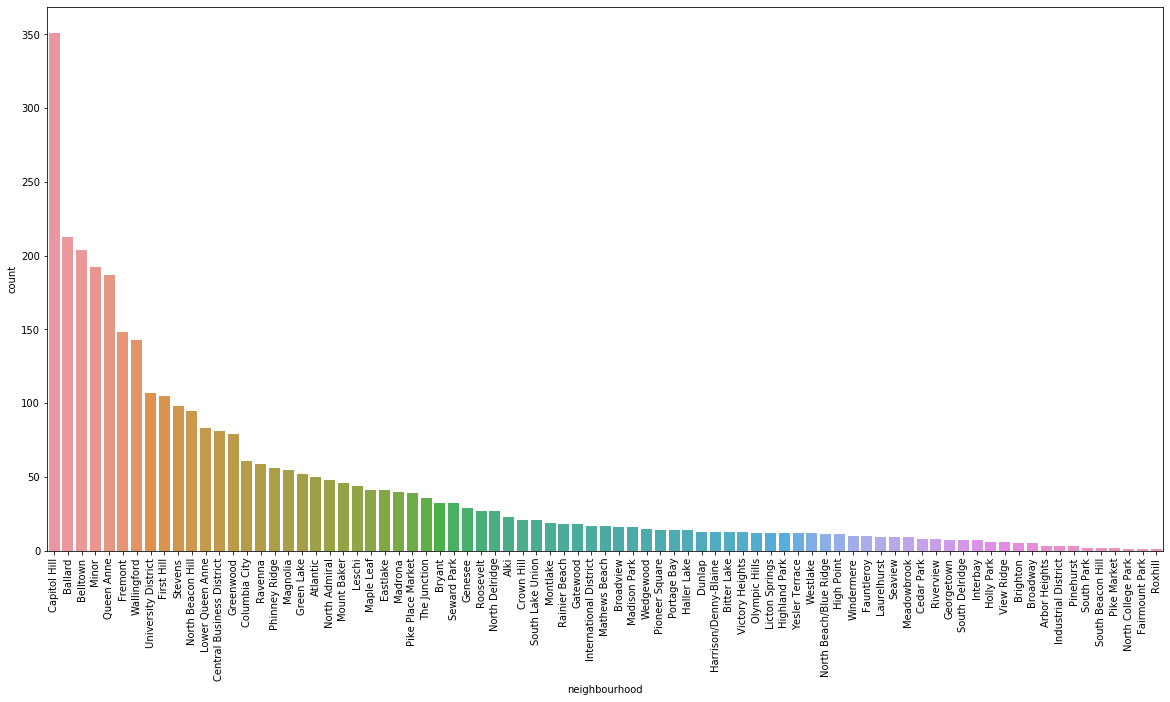

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(data=l_df_mod, x='neighbourhood', order=l_df_mod.neighbourhood.value_counts().index)
plt.xticks(rotation=90)
plt.show()

This graph allows us to see how the distribution of rental properties is spread among the different parts of Seattle.
The Capitol Hill is clearly the busiest place

## PROPERTIES TYPES

Let us now look at how it is distributed among types of properties

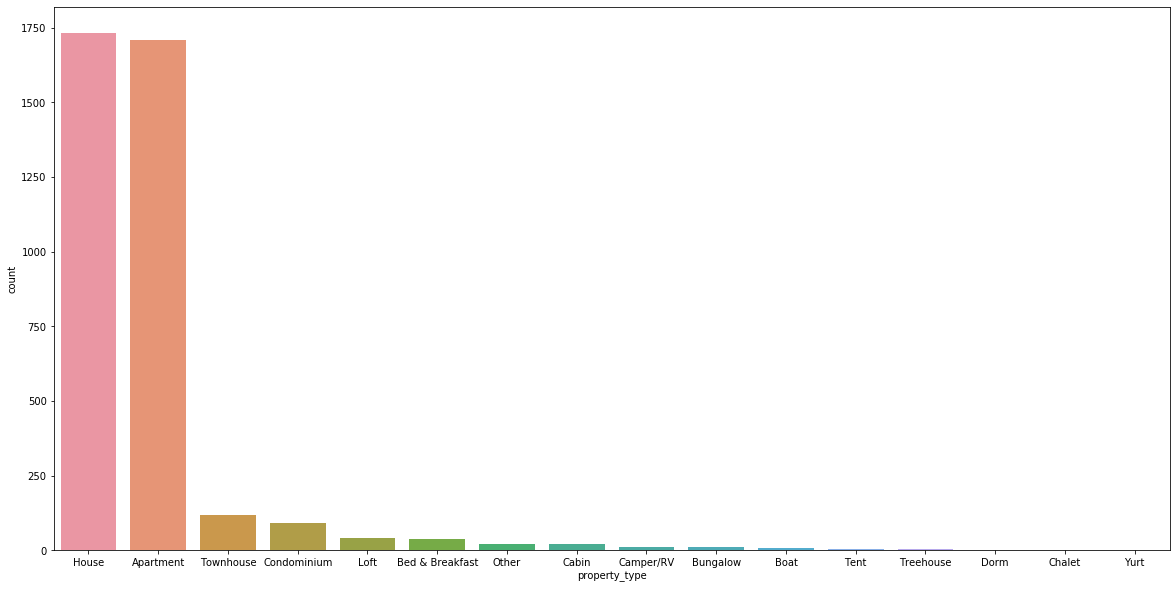

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(data=l_df_mod, x='property_type', order=l_df_mod.property_type.value_counts().index)
plt.show()

Clearly the most dominating rental properties are Houses and Appartments

Let us see what percentage is Houses and Appartments compared to all total listings.

In [21]:
df_types = pd.DataFrame(round(l_df_mod.groupby(by=['property_type']).property_type.count()/l_df_mod.shape[0]*100, 2)).rename(columns={"property_type":'percent'}).reset_index().sort_values(by=['percent'], ascending=False)

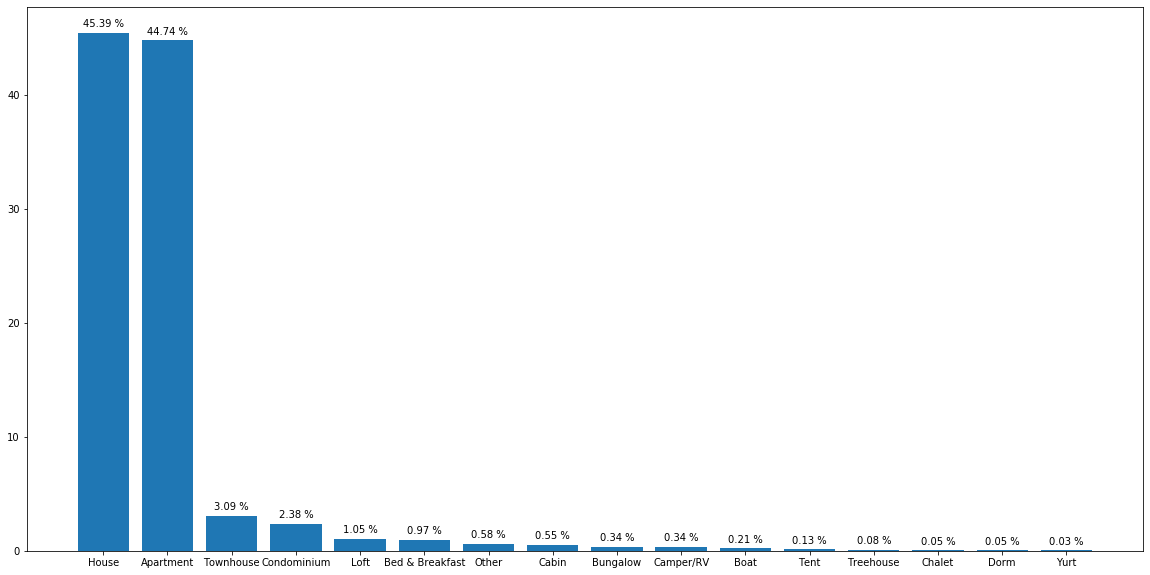

In [22]:
plt.figure(figsize=[20, 10])
plt.bar(x=df_types['property_type'], height=df_types['percent'])
for x, y in zip(df_types.property_type, df_types.percent):
    plt.annotate(xy=[x, y+0.5], s=str(y)+' %', ha='center')
plt.show()

In [23]:
#sum of top 2 types
str(sum(df_types.percent[:2]))+'%'

'90.13%'

## BEDROOMS AND BEDS

In this part I want to look into bedrooms and beds avaliablity. This might be usefull later on to check cost per bedroom/bed etc.

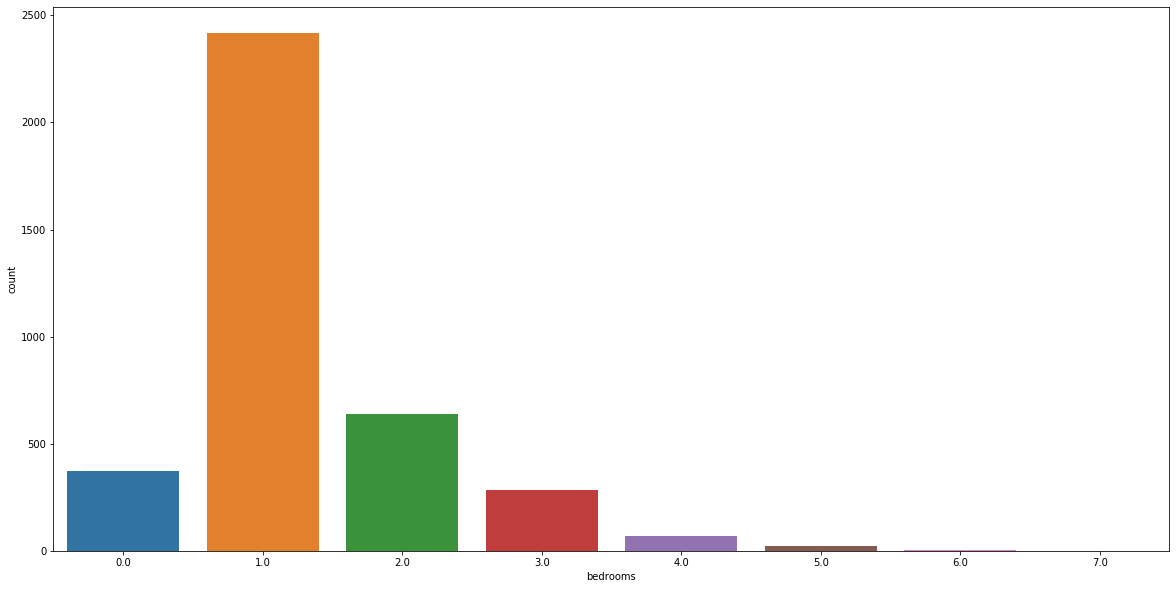

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(data=l_df_mod, x='bedrooms')
plt.show()

Above graph shows that clearly one bedroom appartments are the majority of the listings, this is mostly due to accomodations having 1 double bed etc or some kind of larger size that allows 2 people confortably sleep

The 0 data most likely should be removed from it as it does not really make sense... but then someone might sleep in different place then bedroom, be it living room, guest room etc.

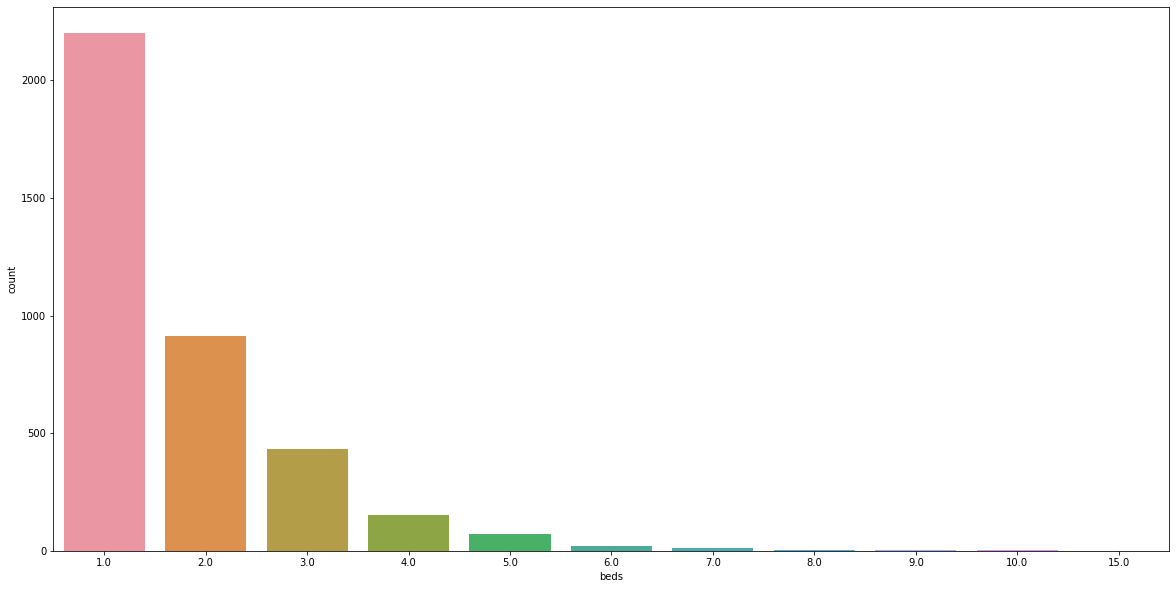

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(data=l_df_mod, x='beds')
plt.show()

Before we go into any conclusion on this one we will make 1 more graph

In [26]:
df_beds = l_df_mod[['bedrooms', 'beds']].copy()

In [27]:
df_beds = pd.DataFrame(df_beds.groupby(by=['bedrooms', 'beds'])['beds'].count())

In [28]:
df_beds.rename(columns={"beds":'count'}, inplace=True)
df_beds.reset_index(inplace=True)
df_beds

,bedrooms,beds,count
0,0.0,1.0,287
1,0.0,2.0,75
2,0.0,3.0,8
3,0.0,4.0,2
4,1.0,1.0,1887
5,1.0,2.0,449
6,1.0,3.0,62
7,1.0,4.0,14
8,1.0,5.0,1
9,1.0,6.0,1


We will need to slightly modify this data in order to plot it correctly

In [29]:
df_beds.bedrooms = df_beds.bedrooms.apply(lambda x: str(x) + ' bedrooms')

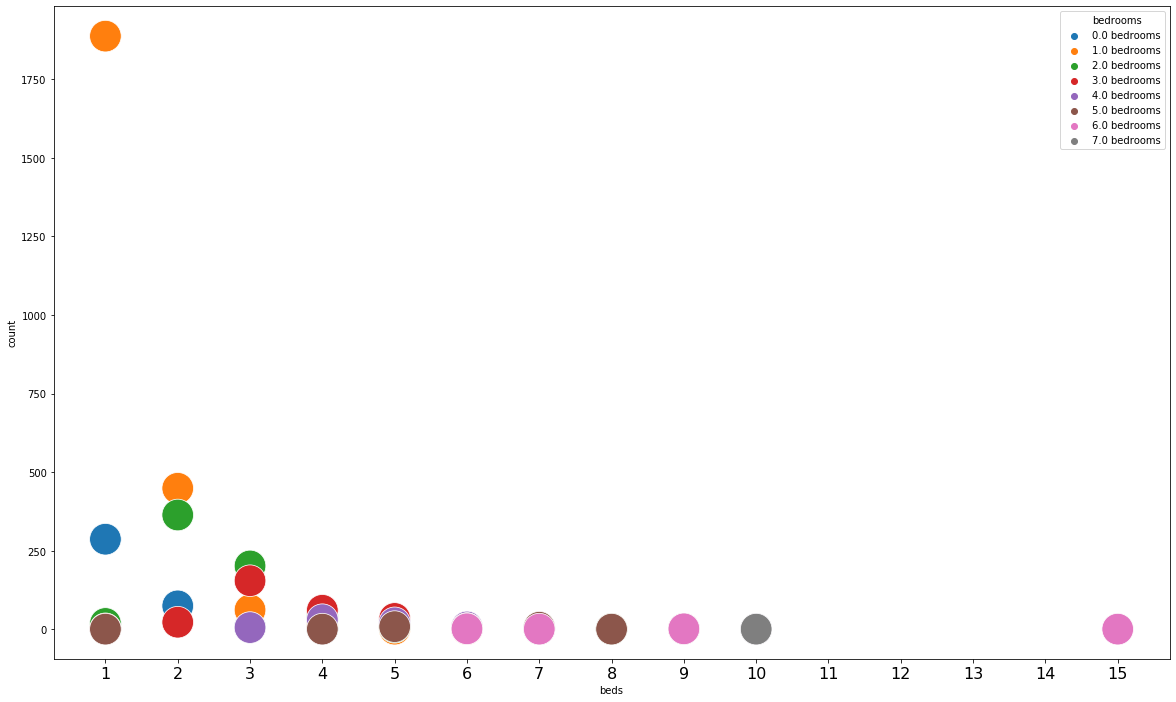

In [30]:
plt.figure(figsize=(20, 12))
sns.scatterplot(data=df_beds, x='beds', y='count', hue='bedrooms', s=1000)
plt.xticks(np.arange(1, 16, 1), fontsize=16)
plt.show()

This grab above combines number of bedrooms with number of beds in bedroom, this provides some interesting data:
 - The significant portions of the establishments have 1 bedrooms with 1 bed
 - The reason why some people lists 0 bedrooms might be that they will accomodate someone in small selfsufficient appartment (like small studio) that could potentially not have dedicated bedroom
 - Higher number of beds mostly coresponds with higher number of bedrooms which makes total sense however, we can see that there are rooms with 5 beds in 1 bedroom
 - We can also see that 1-2 beds in bedroom makes up the significant portion of listings avaliable

## PRICES

Lets start by looking at the histogram of all the prices

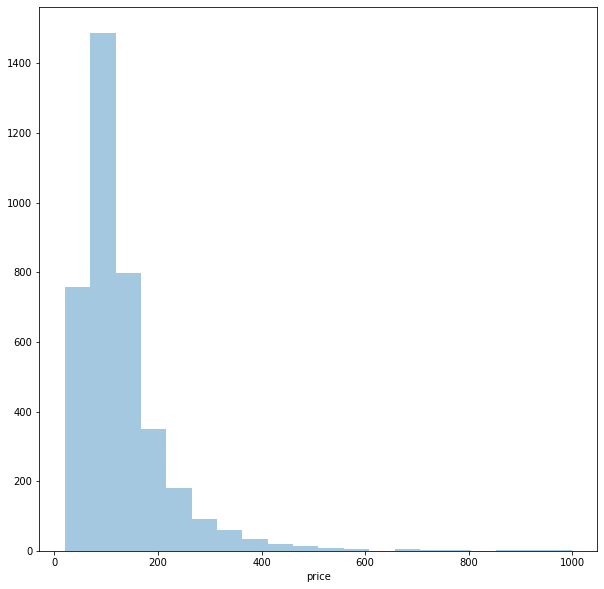

In [31]:
plt.figure(figsize=(10, 10))
sns.distplot(l_df_mod.price, bins=20, kde=False)
plt.show()

In [32]:
min(l_df_mod.price), max(l_df_mod.price)

(20.0, 1000.0)

Observations from above graph:
 - prices range from USD20.00 to USD1000.00
 - the majority of the prices fall between USD20.00 and USD200.00

In [33]:
#function to check if deposit is required or not, for NaN values we will assume that no deposit is required
def deposit_required(x):
    if x > 0:
        return True
    return False

In [34]:
l_df_mod["Deposit_required"] = l_df_mod.security_deposit.apply(deposit_required)

/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


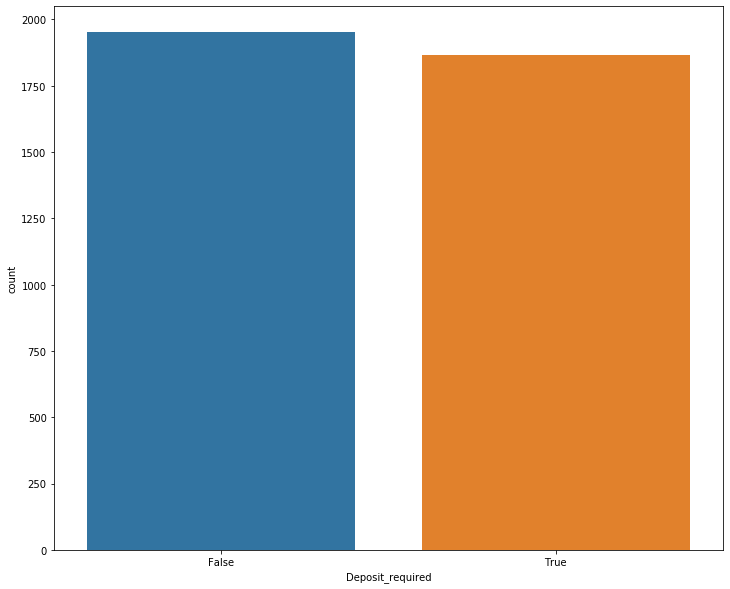

In [35]:
plt.figure(figsize=(12, 10))
sns.countplot(data=l_df_mod, x='Deposit_required')
plt.show()

Looks like almost same amount of listings requiers deposits as the ones that does not
 - we could further explort this data with reviews

Now lets see how the distribution of the cost of extra person looks like

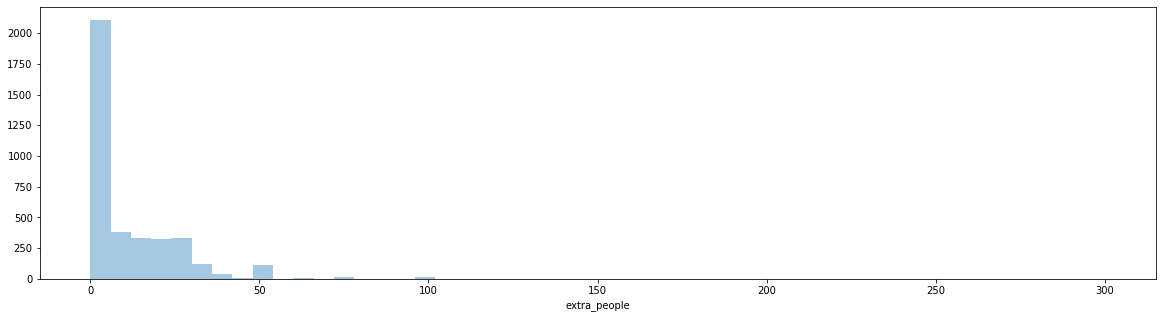

In [36]:
plt.figure(figsize=(20, 5))
sns.distplot(l_df_mod.extra_people, bins=50, kde=False)
plt.show()

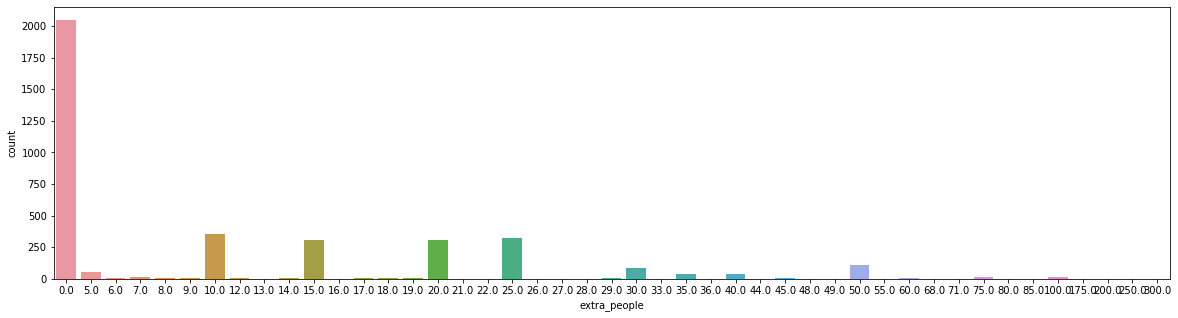

In [37]:
plt.figure(figsize=(20, 5))
sns.countplot(data=l_df_mod, x='extra_people')
plt.show()

From the looks of it above we can see that vast majority does not require any additional fees for extra person (over 2000+ listings), however, there are retiers that do ask for small fee 10, 15, or even 50 USD.

## REVIEWS

Let us see the distribution of reviews

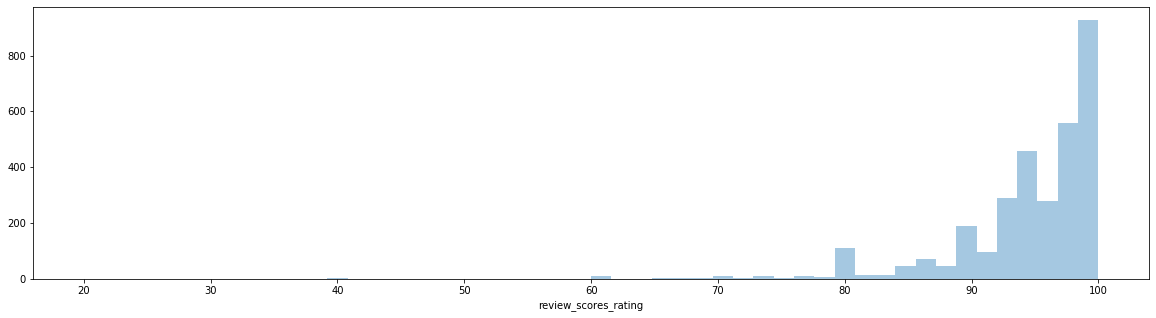

In [38]:
plt.figure(figsize=(20, 5))
sns.distplot(l_df_mod.review_scores_rating, bins=50, kde=False)
plt.show()

Based on the graph above we can see that most of the reviews has score over 85 points.

### From this point we will focus on analysing multiple features

Let us see if properties that requires deposit are having better reviews, and then we can mix price into the analysis

In [39]:
df_deposit = l_df_mod[l_df_mod['Deposit_required'] == True].copy()
df_no_deposit = l_df_mod[l_df_mod['Deposit_required'] == False].copy()

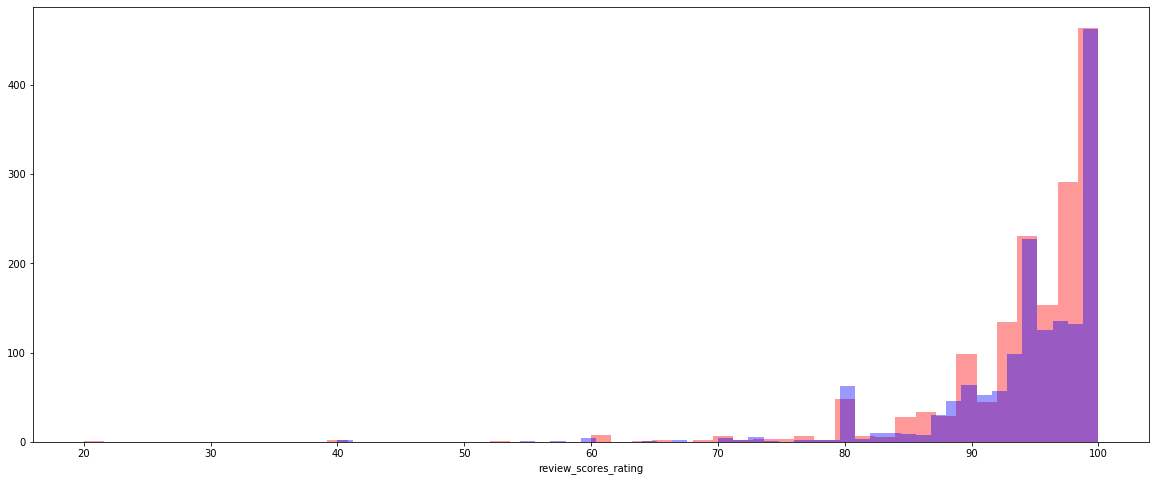

In [40]:
plt.figure(figsize=(20, 8))
sns.distplot(df_deposit.review_scores_rating, bins=50, kde=False, color='red')
sns.distplot(df_no_deposit.review_scores_rating, bins=50, kde=False, color='blue')
plt.show()

The distribution if very similar in both cases, however, we can see that there is a little bit more review for people who rent with deposits, we can see that there are higher bars on red graph which represents rents with required deposit

Let see how the prices look like for the rentals with and without deposit.

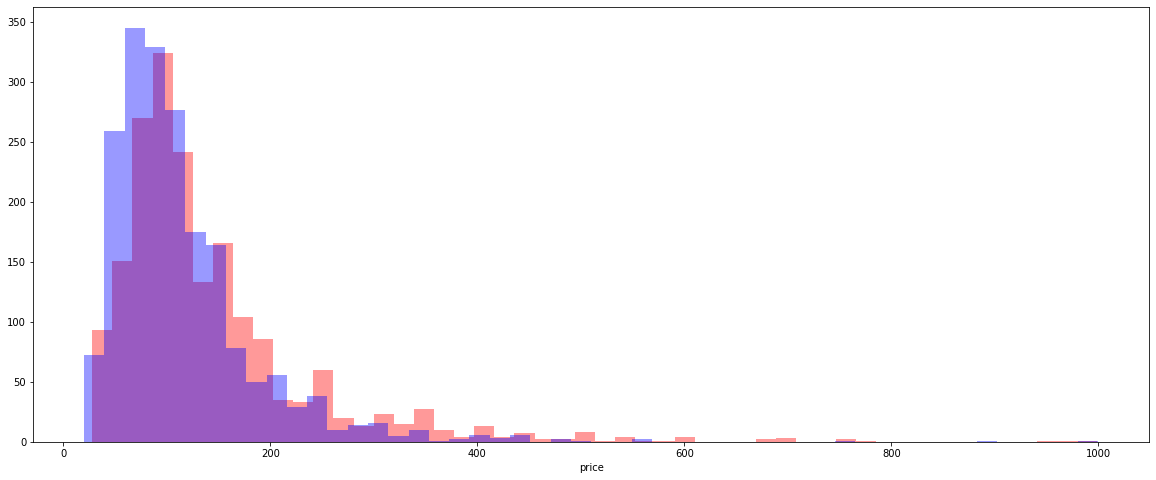

In [41]:
plt.figure(figsize=(20, 8))
sns.distplot(df_deposit.price, bins=50, kde=False, color='red')
sns.distplot(df_no_deposit.price, bins=50, kde=False, color='blue')
plt.show()

There is not much big difference either, however, we can see that no deposit listings have slightly wider distribution on the lower end of prices.

### Coleration between price and rating

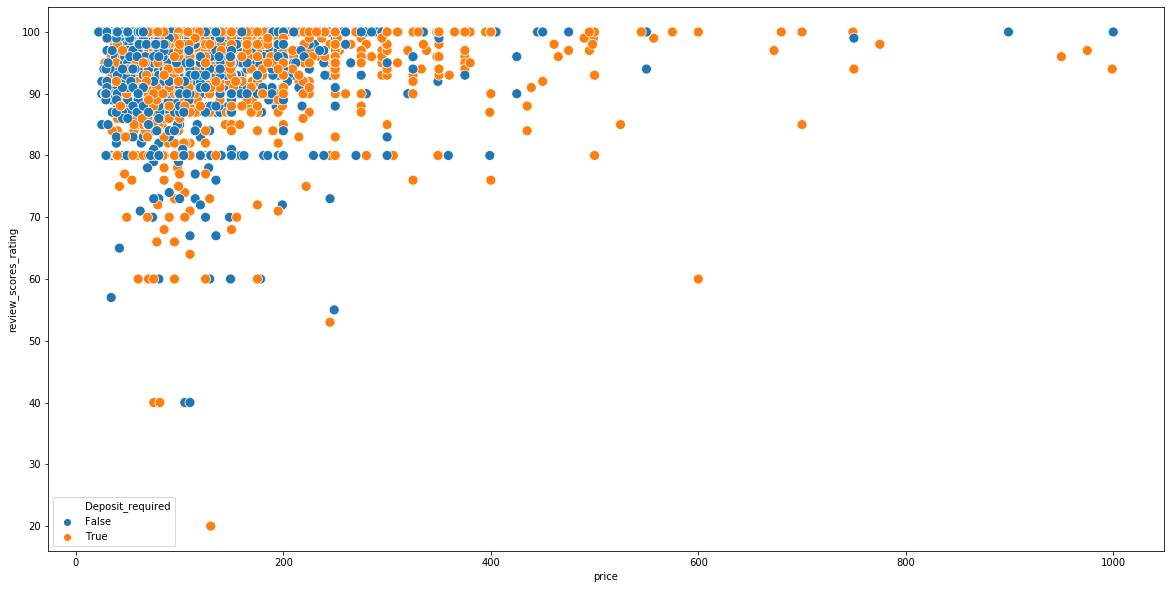

In [42]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=l_df_mod, x='price', y='review_scores_rating', s=100, hue='Deposit_required')
plt.show()

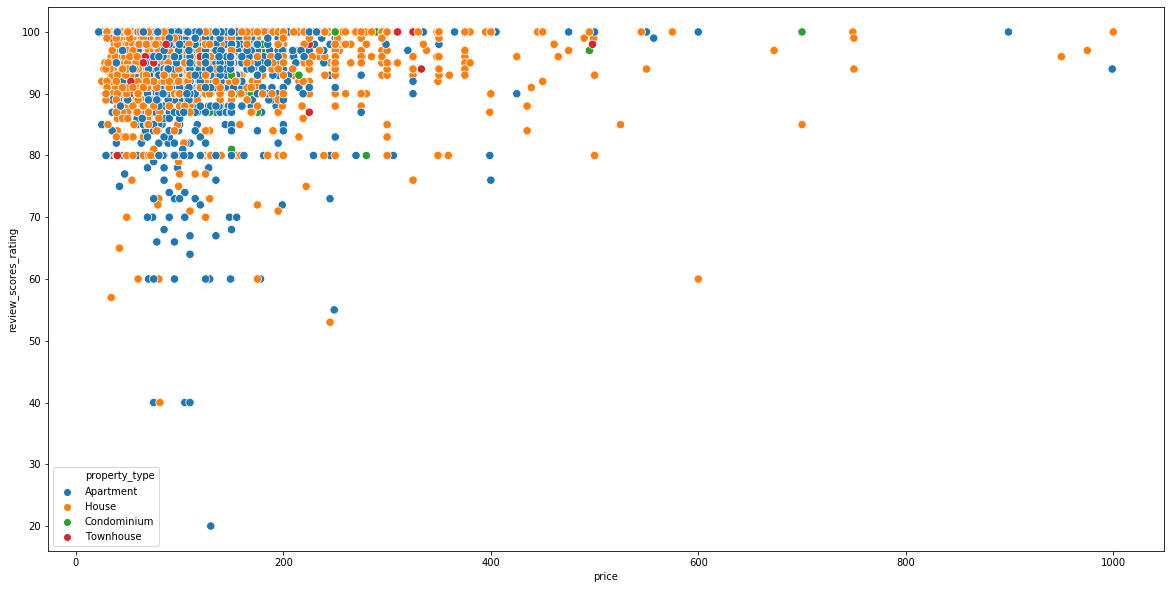

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=l_df_mod[l_df_mod.property_type.isin(['Apartment', 
                                                           'House',
                                                          'Townhouse',
                                                          'Condominium'])], 
                x='price', 
                y='review_scores_rating', 
                s=70, 
                hue='property_type')
plt.show()

Let us calculate cost per bedroom and cost per bed

In [44]:
l_df_mod['per_bedroom'] = l_df_mod.price/l_df_mod.bedrooms
l_df_mod['per_bed'] = l_df_mod.price/l_df_mod.beds

/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
l_df_mod.head()

,listing_id,neighbourhood,property_type,bedrooms,beds,price,security_deposit,extra_people,review_scores_rating,latitude,longitude,Deposit_required,per_bedroom,per_bed
0,241032,Queen Anne,Apartment,1.0,1.0,85.0,NaN,5.0,95.0,47.636289,-122.371025,False,85.0,85.000000
1,953595,Queen Anne,Apartment,1.0,1.0,150.0,100.0,0.0,96.0,47.639123,-122.365666,True,150.0,150.000000
2,3308979,Queen Anne,House,5.0,7.0,975.0,1000.0,25.0,97.0,47.629724,-122.369483,True,195.0,139.285714
3,7421966,Queen Anne,Apartment,0.0,2.0,100.0,NaN,0.0,NaN,47.638473,-122.369279,False,inf,50.000000
4,278830,Queen Anne,House,3.0,3.0,450.0,700.0,15.0,92.0,47.632918,-122.372471,True,150.0,150.000000


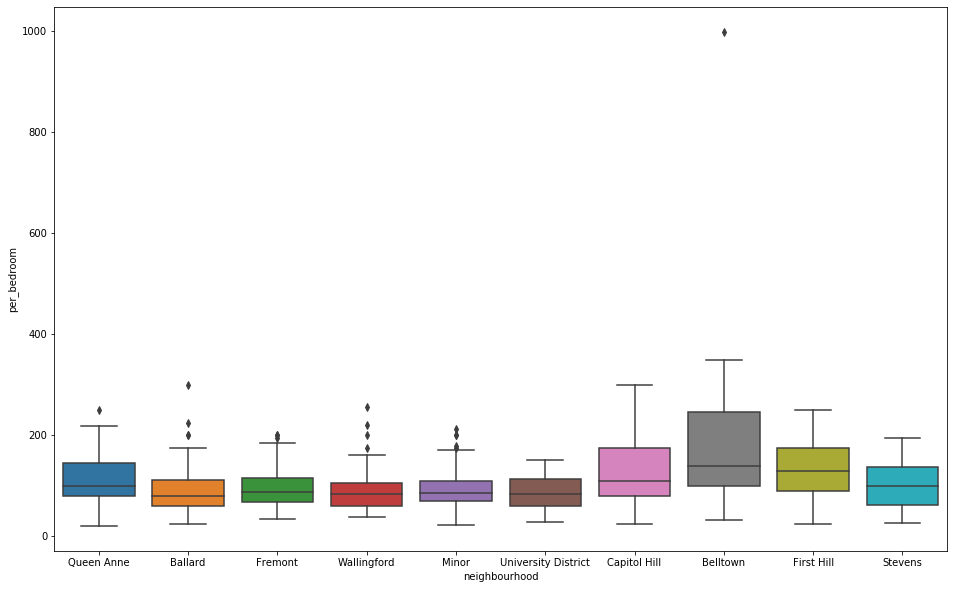

In [46]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=l_df_mod[l_df_mod['neighbourhood'].isin(l_df_mod.neighbourhood.value_counts(ascending=False).index[:10])], 
                x='neighbourhood', y='per_bedroom')
plt.show()

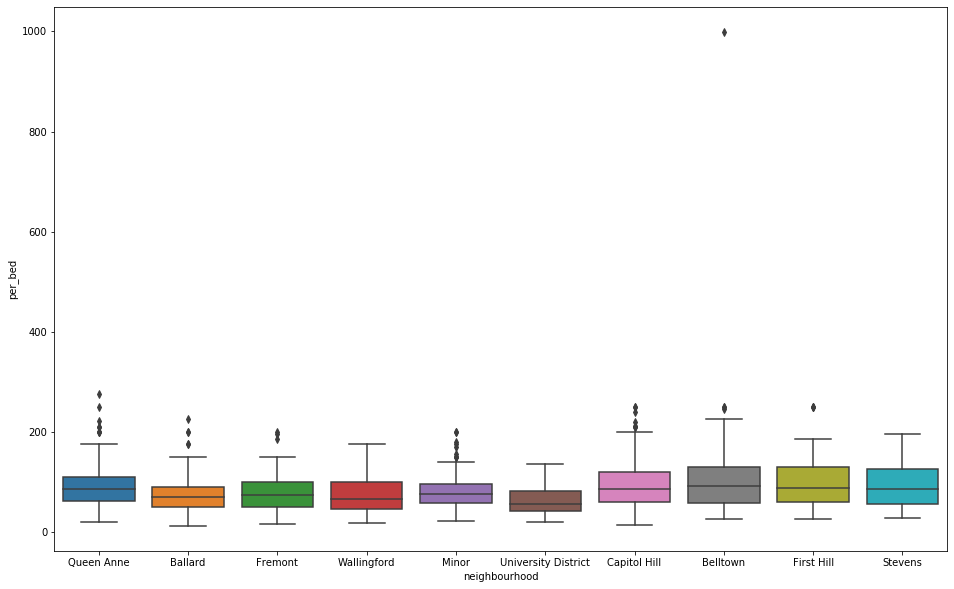

In [47]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=l_df_mod[l_df_mod['neighbourhood'].isin(l_df_mod.neighbourhood.value_counts(ascending=False).index[:10])],
           x='neighbourhood', y='per_bed')
plt.show()

/Users/soundoffear/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
/Users/soundoffear/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__

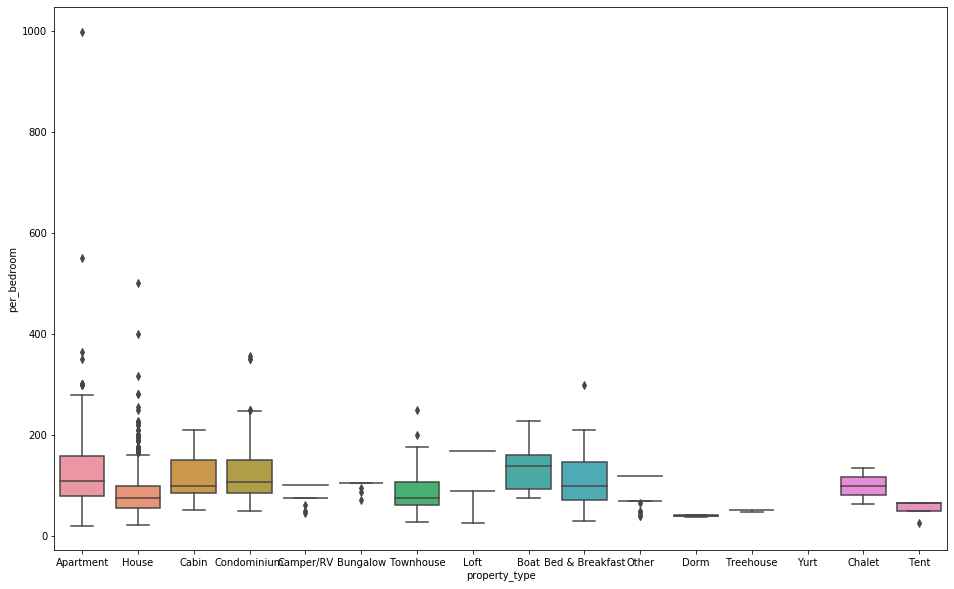

In [48]:
plt.figure(figsize=(16,10))
sns.boxplot(data=l_df_mod,
           x='property_type', y='per_bedroom')
plt.show()

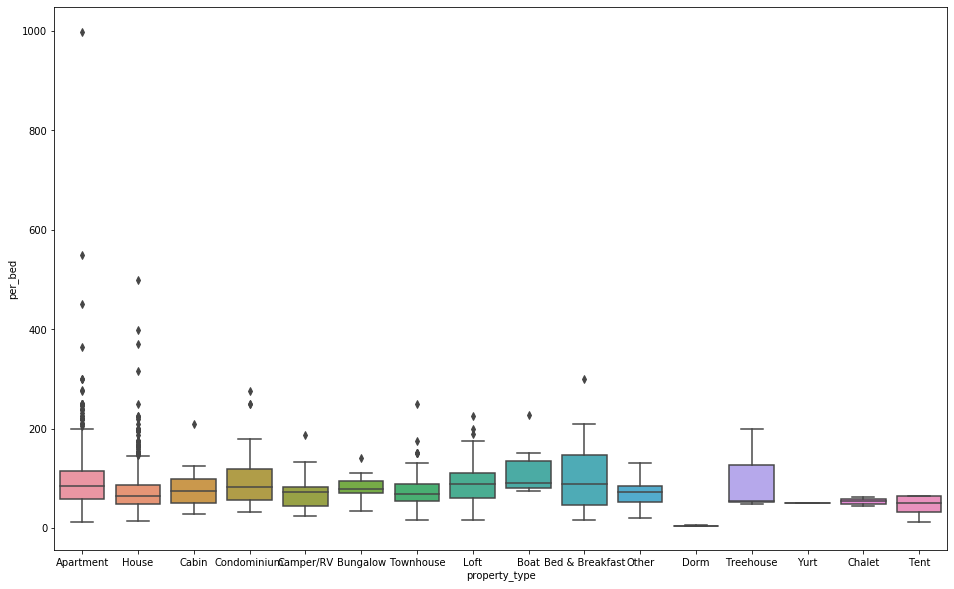

In [49]:
plt.figure(figsize=(16,10))
sns.boxplot(data=l_df_mod,
           x='property_type', y='per_bed')
plt.show()

Now lets see how to prices are placed if we utilize scatter plot with long and lat

Okay so we now know that prices are sort of similar if it comes to types of properties and even places where people are renting, however, we can check try to check how that looks like based on longitude and latitude, that way we can see in which part of the city we cna get what prices and how the distribution looks like.
- first we will split data to only Apartments and House as they cover 90% of the types
- we will have longitude and latitude ploted while prices will be color coded
- we will use circles for appartments and triangles for houses

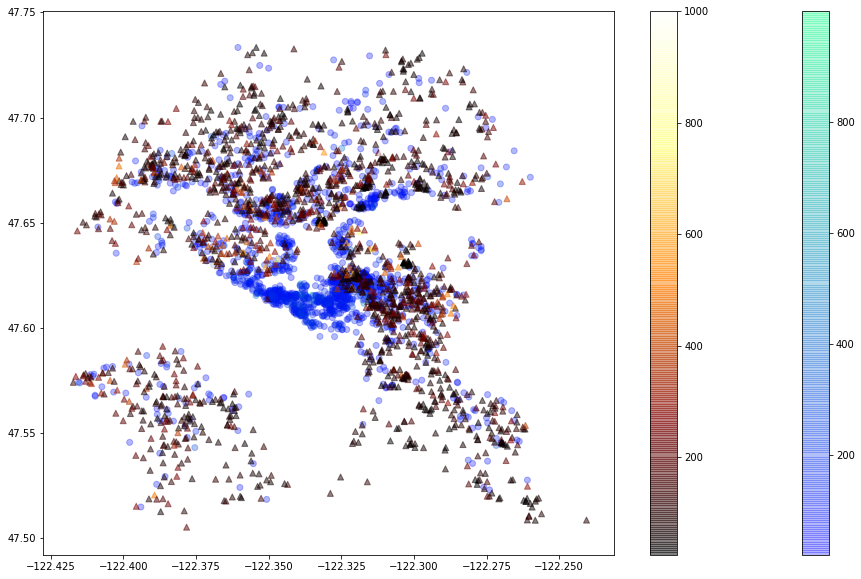

In [50]:
plt.figure(figsize=(16, 10))


xa = l_df_mod[l_df_mod.property_type.isin(['Apartment'])].longitude
ya = l_df_mod[l_df_mod.property_type.isin(['Apartment'])].latitude
pa = l_df_mod[l_df_mod.property_type.isin(['Apartment'])].price
xh = l_df_mod[l_df_mod.property_type.isin(['House'])].longitude
yh = l_df_mod[l_df_mod.property_type.isin(['House'])].latitude
ph = l_df_mod[l_df_mod.property_type.isin(['House'])].price
#label = val
price_placement1 = plt.scatter(x=xa, y=ya, alpha=0.3, c=pa, cmap=plt.cm.winter)
price_placement2 = plt.scatter(x=xh, y=yh, alpha=0.5, marker='^', c=ph, cmap=plt.cm.afmhot)
#plt.legend(l_df_mod.neighbourhood.unique())
plt.colorbar(price_placement1)
plt.colorbar(price_placement2)
plt.show()

Some informations that we can get from this plot are as folows:
- if we want to have more downtown rent/stay we are most likely to have to rent apartment
- houses are spred out in north and south and they do dominate suburban areas
- we cannot really conclude some kind of more expensive area or not, they are very mixed and I would believe that those are just mainly outliers

Let us check how the prices change over the year. First we will have to modify c_df database

In [51]:
c_df.date = pd.to_datetime(c_df.date)

In [52]:
c_df['month'] = c_df.date.dt.month
c_df['year'] = c_df.date.dt.year

In [53]:
c_df.price = pd.to_numeric(c_df.price.apply(lambda x: str(x).replace('$','').replace(',','')), errors='coerce')

In [54]:
c_df.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


In [55]:
c_df.year.unique()

array([2016, 2017])

In [56]:
c_df_2016 = c_df[c_df.year == 2016]
c_df_2017 = c_df[c_df.year == 2017]

In [57]:
c_df_2016.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


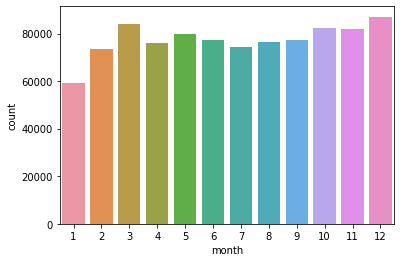

In [58]:
sns.countplot(data=c_df_2016, x='month')

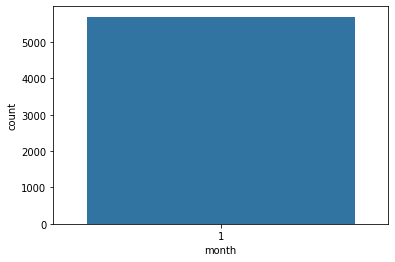

In [59]:
sns.countplot(data=c_df_2017, x='month')

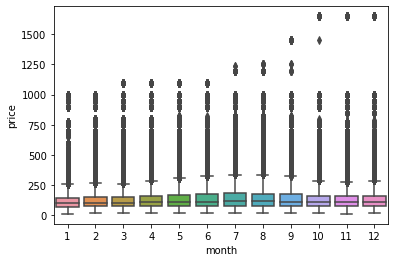

In [60]:
sns.boxplot(data=c_df_2016, x='month', y='price')

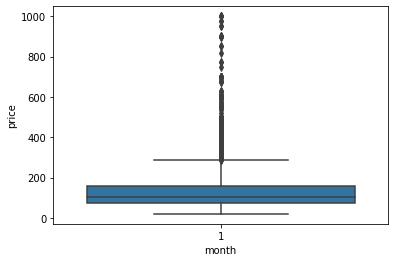

In [61]:
sns.boxplot(data=c_df_2017, x='month', y='price')